In [1]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 13.2 MB 581 kB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=6d053bf9642828a0840254f5d81e30b0b2f7a846ee69df8c53f068734207099d
  Stored in directory: /Users/cc/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer

%matplotlib inline

In [72]:
df = pd.read_csv('covidvaccine.csv').fillna('')

In [70]:
df.drop(["user_created"],axis=1,inplace=True)

In [4]:
df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,,Twitter Web App,False
3,Zane,,Fresher than you.,18-09-2019 11:01,29,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,,Twitter Web App,False


In [6]:
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers      object
user_friends        object
user_favourites     object
user_verified       object
date                object
text                object
hashtags            object
source              object
is_retweet          object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183493 entries, 0 to 183492
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         183493 non-null  object
 1   user_location     183493 non-null  object
 2   user_description  183493 non-null  object
 3   user_created      183493 non-null  object
 4   user_followers    183493 non-null  object
 5   user_friends      183493 non-null  object
 6   user_favourites   183493 non-null  object
 7   user_verified     183493 non-null  object
 8   date              183493 non-null  object
 9   text              183493 non-null  object
 10  hashtags          183493 non-null  object
 11  source            183493 non-null  object
 12  is_retweet        183493 non-null  object
dtypes: object(13)
memory usage: 18.2+ MB


In [164]:
import plotly.express as px
px.histogram(df, x="date",  nbins=100,opacity=.5,title="Tweets by date")

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['text', 'tokenized', 'No_stopwords', 'stemmed_porter', 'stemmed_snowball', 'lemmatized'] but received: date

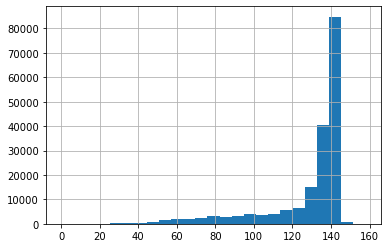

In [9]:
seq_length = [len(i) for i in df['text']]

pd.Series(seq_length).hist(bins = 25)

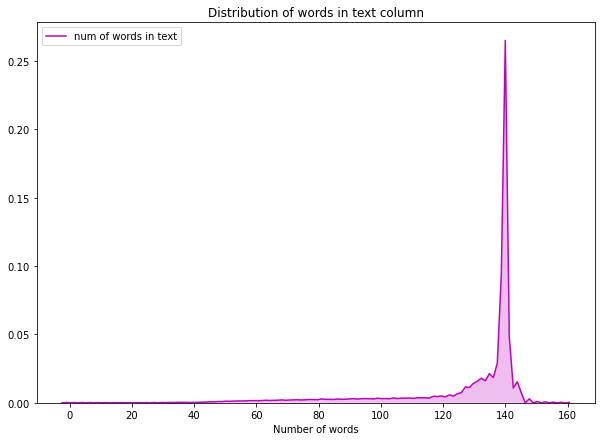

In [10]:
df["num of words in text"] = df["text"].apply(lambda x: len(x))
plt.figure(figsize=(10,7))
sns.kdeplot(df["num of words in text"],shade=True, color='m')
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()


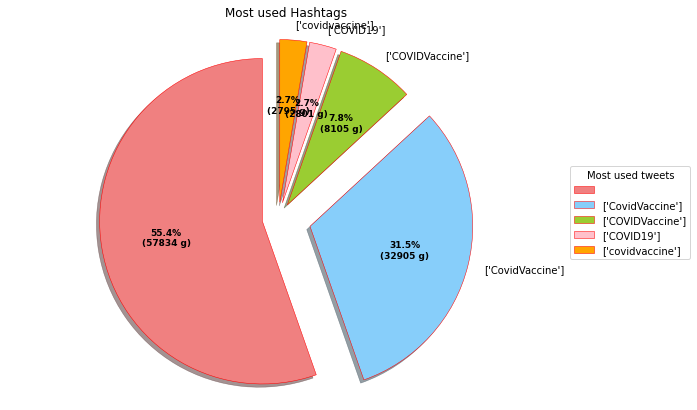

In [12]:
MostUsedTweets = df.hashtags.value_counts().sort_values(ascending=False)[:5]
colors = ['lightcoral', 'lightskyblue', 'yellowgreen', 'pink', 'orange']
explode = (0.1, 0.2, 0.1, 0.1, 0.1) 

# Wedge properties 
wp = { 'linewidth' : 0.5, 'edgecolor' : "red" }

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating the plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(MostUsedTweets,  
                                  autopct = lambda pct: func(pct, MostUsedTweets), 
                                  explode = explode,  
                                  labels = MostUsedTweets.keys(), 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, MostUsedTweets.keys(), 
          title ="Most used tweets", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold") 
ax.set_title("Most used Hashtags") 
plt.axis('equal')
plt.show()

In [87]:
y=df[df['date'].str.contains('coronavirus')]
y

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
27431,265208E2 #BeyHive #SameLove,2014-05-03 07:38:07,129,932,444,False,2020-12-30 18:10:44,Me on the 31st 🙋‍♂️😂\n#southafricancoronavirus...,"['southafricancoronavirus', 'CovidVaccine', 'l...",Twitter for Android,False,,


In [89]:
test1 = list(y.date)
test1

["['southafricancoronavirus', 'CovidVaccine', 'lockdown', 'coronavirus']"]

In [90]:
test2 = list(df.date)
test2

['18-08-2020 12:55',
 '18-08-2020 12:55',
 '18-08-2020 12:46',
 '18-08-2020 12:45',
 '18-08-2020 12:45',
 '18-08-2020 12:44',
 '18-08-2020 12:34',
 '18-08-2020 12:30',
 '18-08-2020 12:15',
 '18-08-2020 11:57',
 '18-08-2020 11:12',
 '18-08-2020 11:04',
 '18-08-2020 11:02',
 '18-08-2020 10:46',
 '18-08-2020 10:39',
 '18-08-2020 10:38',
 '18-08-2020 10:36',
 '18-08-2020 09:49',
 '18-08-2020 09:13',
 '18-08-2020 09:10',
 '18-08-2020 08:52',
 '18-08-2020 08:00',
 '18-08-2020 07:46',
 '18-08-2020 07:32',
 '18-08-2020 07:30',
 '18-08-2020 07:26',
 '18-08-2020 07:20',
 '18-08-2020 07:04',
 '18-08-2020 06:51',
 '18-08-2020 06:37',
 '18-08-2020 06:00',
 '18-08-2020 05:55',
 '18-08-2020 05:49',
 '18-08-2020 05:45',
 '18-08-2020 05:29',
 '18-08-2020 05:25',
 '18-08-2020 05:25',
 '18-08-2020 04:49',
 '18-08-2020 04:47',
 '18-08-2020 04:40',
 '18-08-2020 04:31',
 '18-08-2020 04:31',
 '18-08-2020 04:30',
 '18-08-2020 04:20',
 '18-08-2020 03:51',
 '18-08-2020 03:37',
 '18-08-2020 03:14',
 '18-08-2020 

In [92]:
ret = list(set(test2)^set(test1))
ret

['',
 '2021-02-12 21:37:22',
 '2020-12-30 10:05:59',
 '2021-01-14 22:32:25',
 '2021-02-10 04:57:44',
 '2021-03-19 22:41:26',
 '2021-01-14 03:17:33',
 '2021-01-23 21:07:18',
 '2021-03-20 14:32:50',
 '2021-02-23 22:24:35',
 '2021-01-22 21:46:01',
 '2021-03-21 08:11:49',
 '2021-01-23 08:11:10',
 '2021-02-15 14:17:42',
 '2020-12-30 15:45:59',
 '2020-12-31 09:14:57',
 '2021-01-12 17:57:05',
 '2021-02-11 02:57:07',
 '2021-02-13 00:35:20',
 '2021-02-24 13:51:43',
 '2021-02-16 09:14:20',
 '2021-02-24 19:16:17',
 '2021-02-02 20:53:46',
 '2021-01-08 11:06:42',
 '2020-12-28 14:54:43',
 '2021-01-25 18:12:37',
 '2021-02-23 13:03:17',
 '2020-11-09 20:22:57',
 '2021-01-25 08:54:34',
 '2021-02-24 20:54:03',
 '2021-01-23 14:45:39',
 '2021-02-24 09:23:36',
 '2021-01-29 01:19:29',
 '2021-01-01 22:47:59',
 '2021-01-21 01:24:50',
 '2021-01-29 13:18:52',
 '2021-01-15 18:11:03',
 '2021-03-12 16:55:37',
 '2021-02-11 08:17:35',
 '2021-03-04 13:18:08',
 '2021-02-23 14:29:55',
 '2021-01-26 12:45:35',
 '2021-01-0

In [94]:
df = df[df.date.isin(ret)]
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,,Twitter Web App,False
3,Zane,,Fresher than you.,18-09-2019 11:01,29,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,,Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183488,Rossendale Council,"Rossendale, Lancashire",News and updates from Rossendale Borough Counc...,2010-03-18 18:41:19,7584,545,1662,True,2021-03-18 14:02:48,You cannot catch coronavirus from the #COVIDVa...,['COVIDVaccine'],Hootsuite Inc.,False
183489,Haringey,"Haringey, London",Haringey news and updates on everything happen...,2011-01-17 09:49:28,21898,994,2588,True,2021-03-18 14:02:43,📢 Don’t miss the #COVIDVaccine pop-up clinic t...,"['COVIDVaccine', 'N15']",Hootsuite Inc.,False
183490,Alex Fernando,"Lincoln, NE",Recruitment Coordinator at CoJMC | College Foo...,2017-11-13 06:11:40,278,600,10938,False,2021-03-18 14:02:31,It's pretty amazing that in just over 1 year s...,,Twitter for iPhone,False
183491,𝖘𝖐𝖎𝖓𝖉𝖊𝖊𝖕𝖙𝖊𝖆𝖗𝖘,Somerset,"‡ #poet • #writer ‡ ♠ ""loves a nice cuppa"" ☕ *...",2019-11-19 13:16:59,133,398,2040,False,2021-03-18 14:02:20,I received my 1st AZ jab on Tuesday &amp; am s...,,Twitter Web App,False


In [96]:
x=df[df['date'].str.contains('CovidVaccine')]
x

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
64306,A person of little confidence but many convic...,2010-09-19 20:03:23,92,747,7533,False,2021-01-25 16:22:08,Thanks to the incredible team at @CNTWNHS for ...,['CovidVaccine'],Twitter Web App,False,,
110776,see our website for details about the service...,2013-04-09 13:58:37,935,75,27,False,2021-02-02 10:44:12,COVID Q&amp;A join via zoom details below; tom...,"['SickleCell', 'thalassaemia', 'COVID19', 'Cov...",Twitter for iPhone,False,,


In [97]:
test1 = list(x.date)
test1

test2 = list(df.date)
test2

ret = list(set(test2)^set(test1))
ret

df = df[df.date.isin(ret)]
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,,Twitter Web App,False
3,Zane,,Fresher than you.,18-09-2019 11:01,29,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,,Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183488,Rossendale Council,"Rossendale, Lancashire",News and updates from Rossendale Borough Counc...,2010-03-18 18:41:19,7584,545,1662,True,2021-03-18 14:02:48,You cannot catch coronavirus from the #COVIDVa...,['COVIDVaccine'],Hootsuite Inc.,False
183489,Haringey,"Haringey, London",Haringey news and updates on everything happen...,2011-01-17 09:49:28,21898,994,2588,True,2021-03-18 14:02:43,📢 Don’t miss the #COVIDVaccine pop-up clinic t...,"['COVIDVaccine', 'N15']",Hootsuite Inc.,False
183490,Alex Fernando,"Lincoln, NE",Recruitment Coordinator at CoJMC | College Foo...,2017-11-13 06:11:40,278,600,10938,False,2021-03-18 14:02:31,It's pretty amazing that in just over 1 year s...,,Twitter for iPhone,False
183491,𝖘𝖐𝖎𝖓𝖉𝖊𝖊𝖕𝖙𝖊𝖆𝖗𝖘,Somerset,"‡ #poet • #writer ‡ ♠ ""loves a nice cuppa"" ☕ *...",2019-11-19 13:16:59,133,398,2040,False,2021-03-18 14:02:20,I received my 1st AZ jab on Tuesday &amp; am s...,,Twitter Web App,False


In [101]:
x=df[df['date'].str.contains('coronavirus')]
x

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet


In [103]:
df.dropna(axis=0, how='any', inplace=True)

<ipython-input-103-f1faabb7d15a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183484 entries, 0 to 183492
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         183484 non-null  object
 1   user_location     183484 non-null  object
 2   user_description  183484 non-null  object
 3   user_created      183484 non-null  object
 4   user_followers    183484 non-null  object
 5   user_friends      183484 non-null  object
 6   user_favourites   183484 non-null  object
 7   user_verified     183484 non-null  object
 8   date              183484 non-null  object
 9   text              183484 non-null  object
 10  hashtags          183484 non-null  object
 11  source            183484 non-null  object
 12  is_retweet        183484 non-null  object
 13  tweet_date        183484 non-null  object
dtypes: object(14)
memory usage: 21.0+ MB


In [163]:
import plotly.graph_objects as go
df['tweet_date']=pd.to_datetime(df['date']).dt.date
tweet_date=df['tweet_date'].value_counts().to_frame().reset_index().rename(columns={'index':'date','tweet_date':'count'})
tweet_date['date']=pd.to_datetime(tweet_date['date'])
tweet_date=tweet_date.sort_values('date',ascending=False)

fig=go.Figure(go.Scatter(x=tweet_date['date'],
                                y=tweet_date['count'],
                               mode='markers+lines',
                               name="Submissions",
                               marker_color='dodgerblue'))

fig.update_layout(
    title_text='Tweets per Day : ({} - {})'.format(df['tweet_date'].sort_values()[0].strftime("%d/%m/%Y"),
                                                       df['tweet_date'].sort_values().iloc[-1].strftime("%d/%m/%Y")),template="plotly_dark",
    title_x=0.5)

fig.show()

KeyError: 'date'

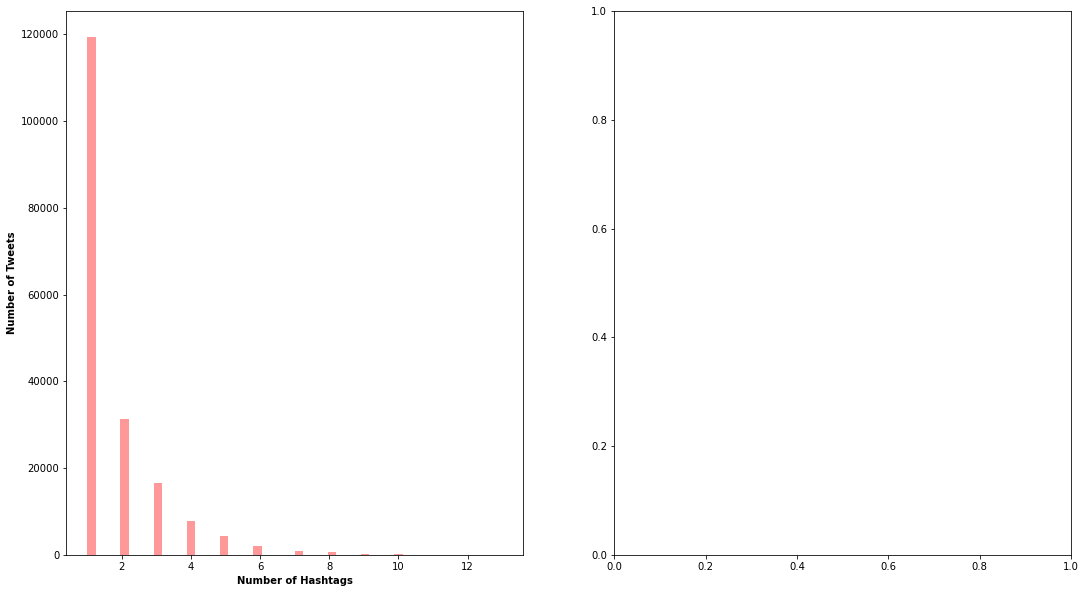

In [106]:
fig, ax = plt.subplots(1,2, figsize=(18, 10))

sns.distplot(df['hashtags'].dropna().apply(lambda x: len(x.split(','))).tolist(), kde=False, ax=ax[0], color='red')
ax[0].set_xlabel("Number of Hashtags", weight='bold')
ax[0].set_ylabel('Number of Tweets', weight='bold')

plt.show()

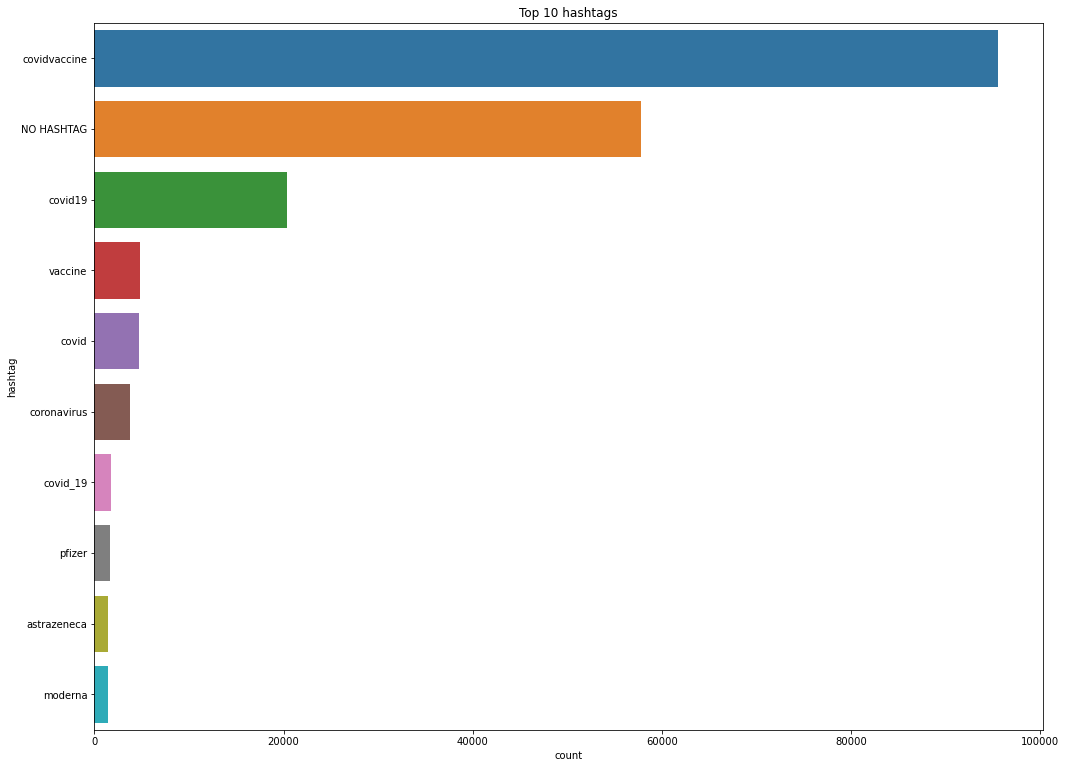

In [107]:
def split_hashtags(x): 
    return str(x).replace('[', '').replace(']', '').split(',')

df = df.copy()
df['hashtag'] = df['hashtags'].apply(lambda row : split_hashtags(row))
df = df.explode('hashtag')
df['hashtag'] = df['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')
df.loc[df['hashtag']=='', 'hashtag'] = 'NO HASHTAG'


ds = df['hashtag'].value_counts().reset_index()
ds.columns = ['hashtag', 'count']
ds = ds.sort_values(['count'],ascending=False)
fig = sns.barplot(
    x=ds.head(10)["count"], 
    y=ds.head(10)['hashtag'], 
    orientation='horizontal', 
    #title='Top 20 hashtags', 
    #width=800, 
    #height=700
).set_title('Top 10 hashtags')
#fig.show()

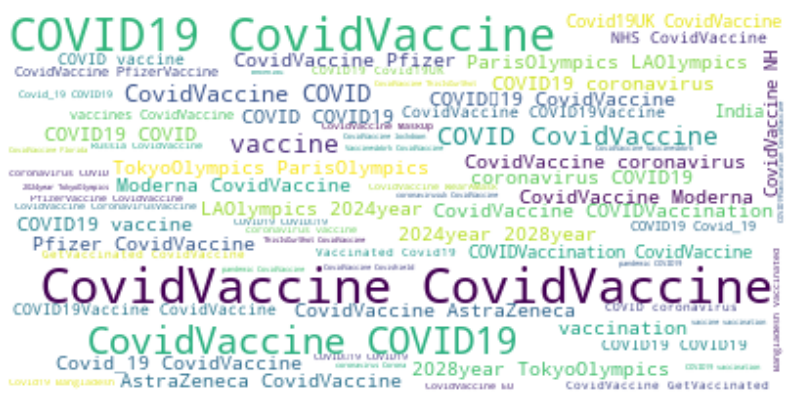

In [108]:
import itertools
from wordcloud import WordCloud

list_hashtags = df['hashtags'].dropna().str.lstrip('[').str.rstrip(']').str.replace("'", "").str.split(', ').tolist()
list_hashtags = list(itertools.chain(*list_hashtags))

plt.figure(figsize=(14,10))
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(' '.join(list_hashtags))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [109]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/cc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/cc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [111]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

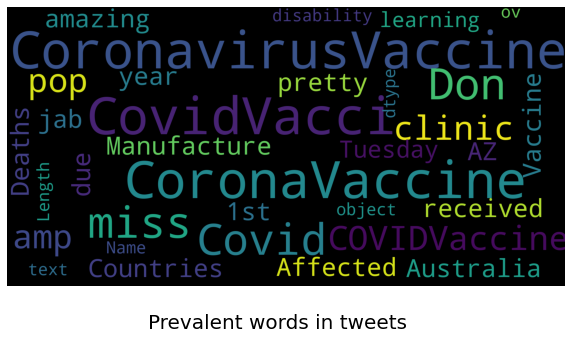

In [112]:
show_wordcloud(df['text'], title = 'Prevalent words in tweets')

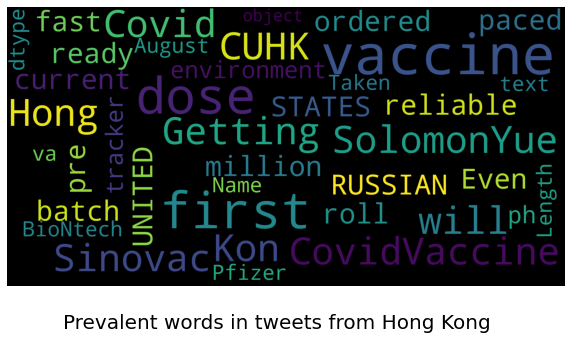

In [113]:
HK_df = df.loc[df.user_location=="Hong Kong"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from Hong Kong')

In [165]:
CH_df = df.loc[df.user_location=="USA"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from Hong Kong')

AttributeError: 'DataFrame' object has no attribute 'user_location'

In [114]:
text_list = df["text"].to_list()
text = ""
for i in text_list:
    text = text + i.split("https:")[0]
    
text = text.replace(" ",",")
text = re.sub("[\@\#\n\.\…\?\\\'\d\)\(\%\*]", ",", text)
text = re.sub(",{2,}", ",", text)

text[:1000]

'Australia,to,Manufacture,Covid-,Vaccine,and,give,it,to,the,Citizens,for,free,of,cost:,AFP,quotes,Prime,Minister,CovidVaccine,CoronavirusVaccine,CoronaVaccine,CovidVaccine,Australia,is,doing,very,good,CoronavirusVaccine,CoronaVaccine,CovidVaccine,Australia,is,doing,very,good,CoronavirusVaccine,CoronaVaccine,CovidVaccine,Australia,is,doing,very,good,Deaths,due,to,COVID-,in,Affected,Countries,Read,More:,Team_Subhashree,subhashreesotwe,iamrajchoco,Stay,safe,subhashreesotwe,di,&amp;,iamrajchoco,da,❤️❤️,michellegrattan,ConversationEDU,This,is,what,passes,for,leadership,in,our,country:,a,voucher,for,something,that,w,The,Multi-system,Inflammatory,Syndrome-Children,MIS-C,w/,COVID,atypical,Kawasaki,disease,COVID,India,The,The,Multi-system,Inflammatory,Syndrome-Children,MIS-C,w/,COVID,atypical,Kawasaki,disease,COVID,India,The,PrivilRodrigues,yatish,deepkaranahuja,shristi,Amrita,RashmiSriniva,AkashRK_,SJanaQA,MSNBC,Well,let’s,qualify,that:,would,anyone,of,any,party,get,a,vaccine,rushed,out,and,mi

In [115]:
text = text.split(',')
text[:10]

['Australia',
 'to',
 'Manufacture',
 'Covid-',
 'Vaccine',
 'and',
 'give',
 'it',
 'to',
 'the']

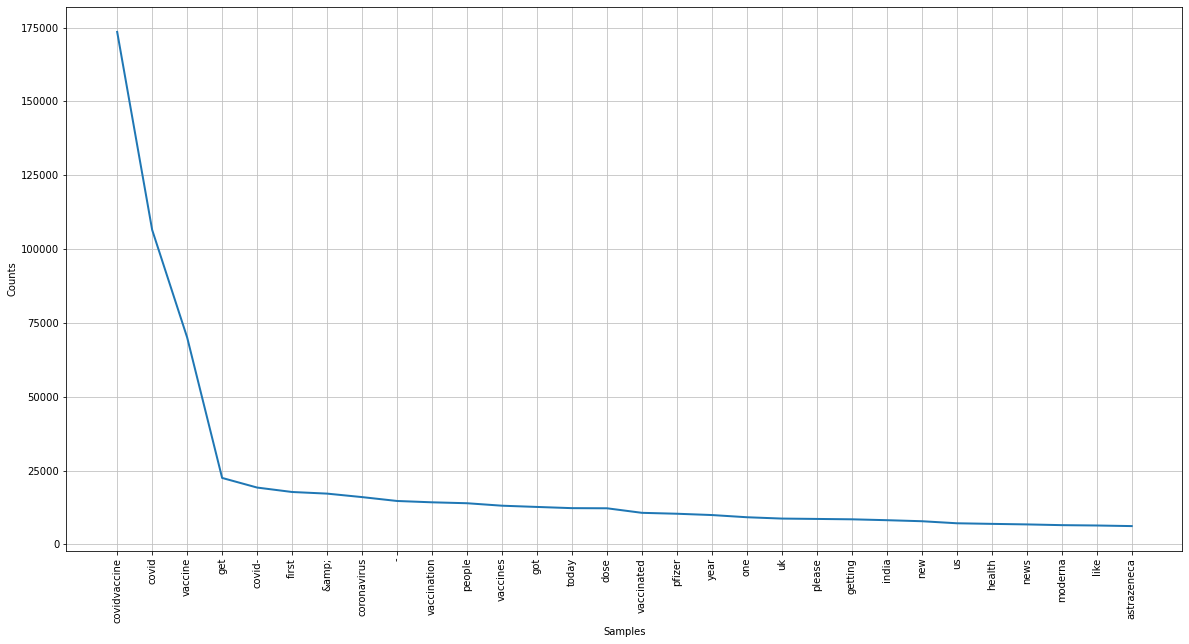

In [117]:
import re
from wordcloud import WordCloud
import nltk
import string
from nltk.corpus import stopwords
from nltk.probability import FreqDist

def stop_w(x):
    new_s = []
    for i in text:
        if i.lower() not in stopwords.words("english"):
            new_s.append(i.lower())
    return new_s

text = stop_w(text)

plt.figure(figsize=(20,10))
FreqDist(text).plot(30)

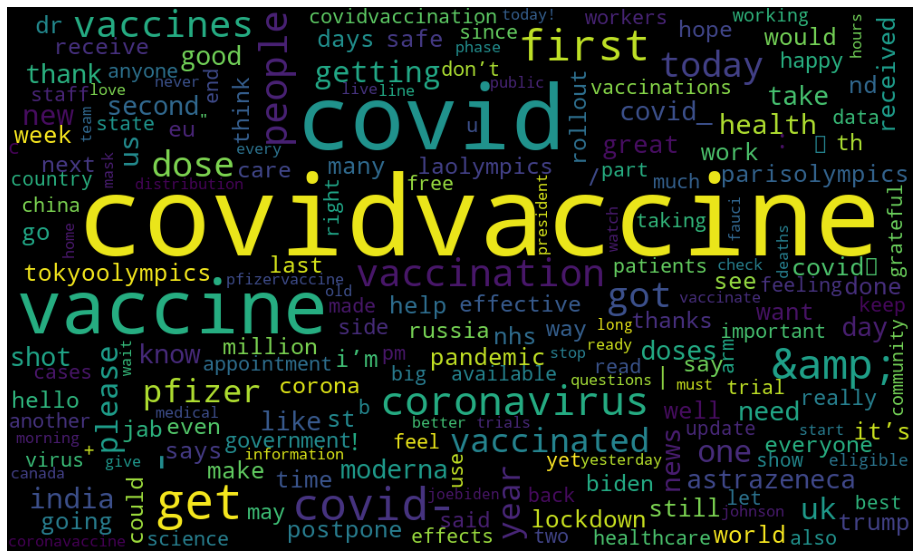

In [118]:
text_count = pd.Series(text).value_counts()
wc = WordCloud(width=1000, height=600, background_color="black", random_state=0)
plt.figure(figsize=(20,10),facecolor='w')
plt.imshow(wc.generate_from_frequencies(text_count))
plt.axis("off")
plt.show()

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
%matplotlib inline

In [121]:
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import random
plt.rc('figure',figsize=(17,13))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [129]:
data = df
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312783 entries, 0 to 183492
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         312783 non-null  object
 1   user_location     312783 non-null  object
 2   user_description  312783 non-null  object
 3   user_created      312783 non-null  object
 4   user_followers    312783 non-null  object
 5   user_friends      312783 non-null  object
 6   user_favourites   312783 non-null  object
 7   user_verified     312783 non-null  object
 8   date              312783 non-null  object
 9   text              312783 non-null  object
 10  hashtags          312783 non-null  object
 11  source            312783 non-null  object
 12  is_retweet        312783 non-null  object
 13  tweet_date        312783 non-null  object
 14  hashtag           312783 non-null  object
dtypes: object(15)
memory usage: 38.2+ MB


In [130]:
stop_words = (set(stopwords.words('english')))
sno = SnowballStemmer('english')

def remove_html_tags(sentence):
    regex = re.compile(pattern='<.*?>')
    clean_text = re.sub(regex, ' ', sentence)
    return clean_text

def remove_punctuations(word):
    cleaned_sentence = re.sub(pattern=r'[?|!|\|"|#|\']', repl=r'', string=word)
    cleaned_sentence = re.sub(pattern=r'[.|,|)|(|\|/]', repl=r'', string=cleaned_sentence)
    return cleaned_sentence

def get_preprocessed_data(data, feature, cleaned_feature):
        i = 0
        final_string = []

        sentences = data[feature].values
        for sentence in sentences:
            filtered_sentence = []
            sentence = remove_html_tags(sentence)
            for word in sentence.split():
                for clean_word in remove_punctuations(word).split():
                    if clean_word.isalpha() and len(clean_word) > 2:
                        if clean_word.lower() not in stop_words:
                            s = (sno.stem(clean_word.lower()))
                            filtered_sentence.append(s)

            string = " ".join(filtered_sentence)
            final_string.append(string)
            i += 1
        data[cleaned_feature] = final_string
        return data

data = get_preprocessed_data(data, 'text', 'Tidy Tweet')
data = get_preprocessed_data(data, 'hashtags', 'Tidy hashtags')

Neutral     167227
Positive     98518
Negative     47038
Name: Sentiment, dtype: int64


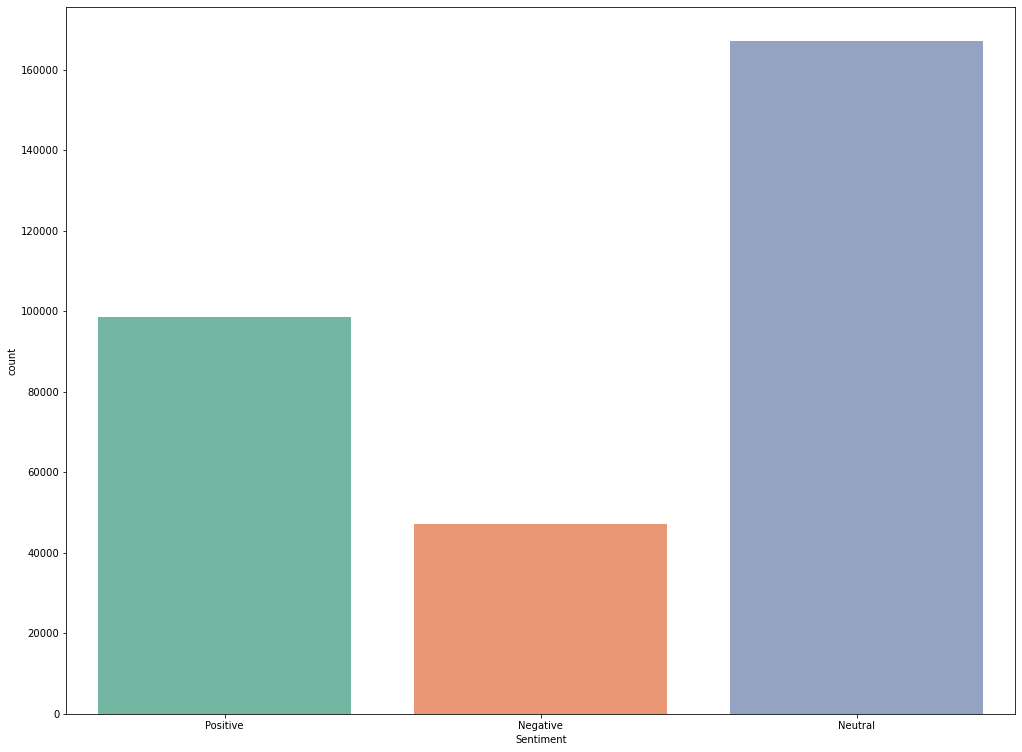

In [131]:
sentiment = SentimentIntensityAnalyzer()
def get_sentiment(data):
    sentiment_list = []
    for text in list(data['Tidy Tweet'].values):
        if sentiment.polarity_scores(text)["compound"] > 0:
            sentiment_list.append("Positive")
        elif sentiment.polarity_scores(text)["compound"] < 0:
            sentiment_list.append("Negative")
        else:
            sentiment_list.append("Neutral")
    return sentiment_list
        
data['Sentiment'] = get_sentiment(data)
sns.countplot(x="Sentiment", data=data, palette="Set2")
print(data.Sentiment.value_counts())

In [135]:
def get_word_cloud(sentiment):
    stop_words = (set(stopwords.words('english')))
    remove_words = ['vaccin', 'pfizerbiontech', 'coronavirus', 'pfizer', 'covid', 'covidvaccin', 'pfizervaccin']
    stop_words = remove_words + list(stop_words)
    plt.figure(figsize=[15,15])
    clean_tweets= "".join(list(data[data['Sentiment']==sentiment]['Tidy Tweet'].values))
    wordcloud = WordCloud(width=700,height=400, background_color='white',colormap='plasma', max_words=50, stopwords=stop_words, collocations=False).generate(clean_tweets)
    plt.title(f"Top 50 {sentiment} words used in tweets", fontsize=20)
    plt.imshow(wordcloud)
    return plt.show()

AttributeError: 'Line2D' object has no property 'xlabel'

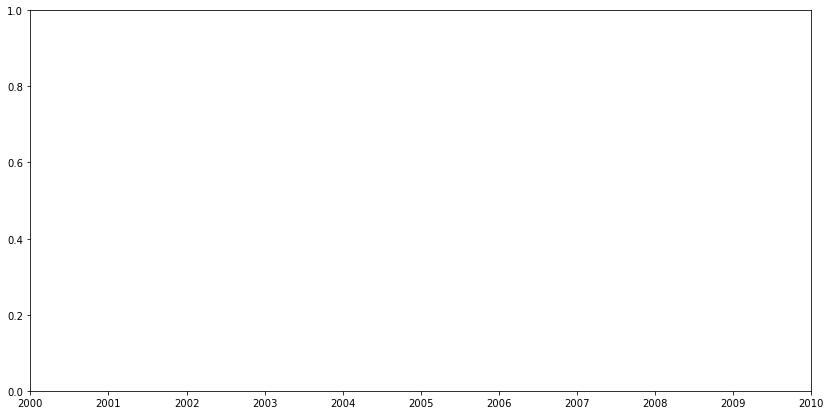

In [138]:
data['date'] = pd.to_datetime(data['date']).dt.date
negative_data = data[data['Sentiment']=='Negative'].reset_index()
positive_data = data[data['Sentiment']=='Positive'].reset_index()
grouped_data_neg = negative_data.groupby('date')['Sentiment'].count().reset_index()
grouped_data_pos = positive_data.groupby('date')['Sentiment'].count().reset_index()
merged_data = pd.merge(grouped_data_neg, grouped_data_pos, left_on='date', right_on='date', suffixes=(' Negative', ' Positive'))

merged_data.plot(x='date', y=['Sentiment Negative', 'Sentiment Positive'], figsize=(14, 7), marker='o', xlabel='date', ylabel='Count', title='Tweet count over a period of time')

In [139]:
data.text = data.text.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
data.text = data.text.apply(lambda x:re.sub(r'\B#\S+','',x))


# Remove URLS
data.text = data.text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
data.text = data.text.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
data.text = data.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
data.text = data.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [140]:
sid = SIA()
data['sentiments']           = data['text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
data['Positive Sentiment']   = data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
data['Neutral Sentiment']    = data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
data['Negative Sentiment']   = data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

data.drop(columns=['sentiments'],inplace=True)

In [141]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,source,is_retweet,tweet_date,hashtag,Tidy Tweet,Tidy hashtags,Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11.0,110.0,False,2020-08-18,Australia to Manufacture Covid 19 Vaccine and ...,...,Twitter Web App,False,2020-08-18,covidvaccine,australia manufactur vaccin give citizen free ...,,Positive,0.148001,0.852001,0.000001
1,Shubham Gupta,,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17.0,0.0,False,2020-08-18,Australia is doing very good,...,Twitter for Android,False,2020-08-18,coronavirusvaccine,coronavirusvaccin coronavaccin covidvaccin aus...,coronavaccin,Positive,0.444001,0.556001,0.000001
1,Shubham Gupta,,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17.0,0.0,False,2020-08-18,Australia is doing very good,...,Twitter for Android,False,2020-08-18,coronavaccine,coronavirusvaccin coronavaccin covidvaccin aus...,coronavaccin,Positive,0.444001,0.556001,0.000001
1,Shubham Gupta,,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17.0,0.0,False,2020-08-18,Australia is doing very good,...,Twitter for Android,False,2020-08-18,covidvaccine,coronavirusvaccin coronavaccin covidvaccin aus...,coronavaccin,Positive,0.444001,0.556001,0.000001
2,Journal of Infectiology,,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143,566.0,8.0,False,2020-08-18,Deaths due to COVID 19 in Affected Countries R...,...,Twitter Web App,False,2020-08-18,NO HASHTAG,death due affect countri read,,Negative,0.000001,0.849001,0.151001


In [142]:
#Number of Words
data['Number_Of_Words'] = data.text.apply(lambda x:len(x.split(' ')))
#Average Word Length
data['Mean_Word_Length'] = data.text.apply(lambda x:np.round(np.mean([len(w) for w in x.split(' ')]),2) )

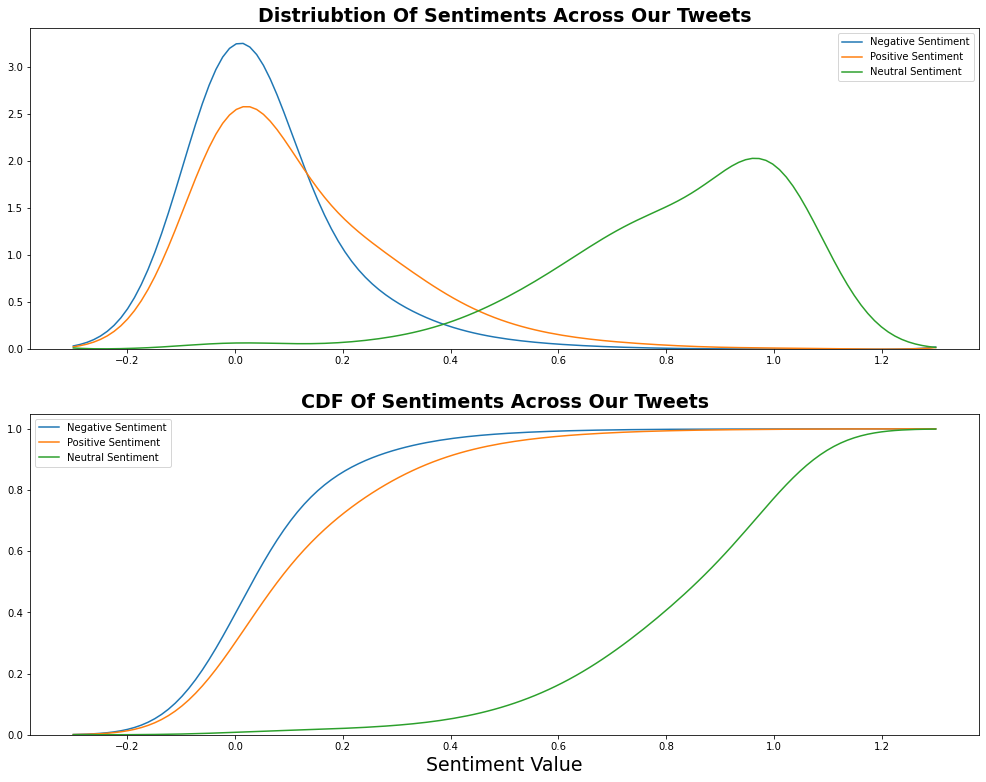

In [143]:
plt.subplot(2,1,1)
plt.title('Distriubtion Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(data['Negative Sentiment'],bw=0.1)
sns.kdeplot(data['Positive Sentiment'],bw=0.1)
sns.kdeplot(data['Neutral Sentiment'],bw=0.1)
plt.subplot(2,1,2)
plt.title('CDF Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(data['Negative Sentiment'],bw=0.1,cumulative=True)
sns.kdeplot(data['Positive Sentiment'],bw=0.1,cumulative=True)
sns.kdeplot(data['Neutral Sentiment'],bw=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.show()

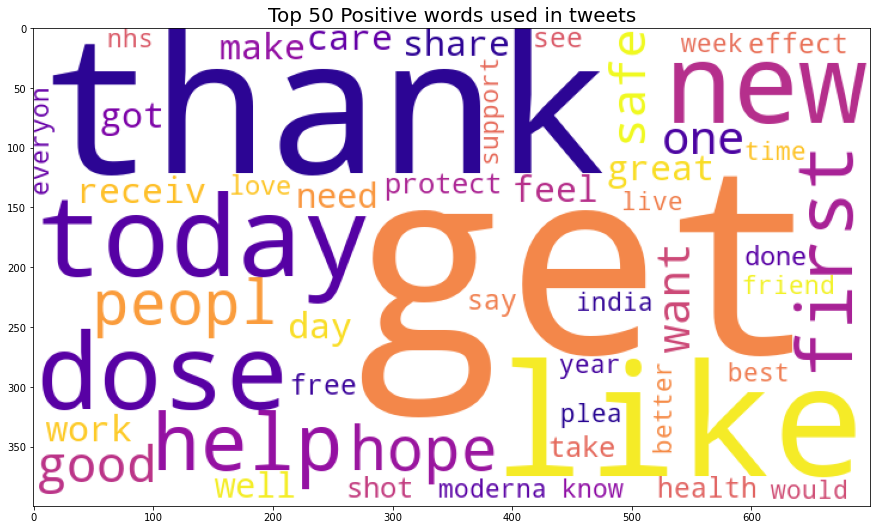

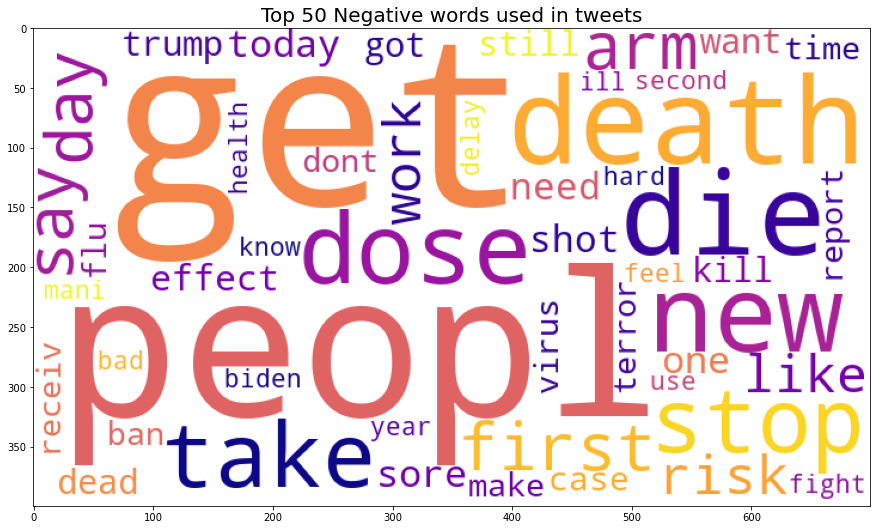

In [144]:
get_word_cloud(sentiment='Positive')
get_word_cloud(sentiment='Negative')

In [145]:
from plotly.subplots import make_subplots

In [146]:
b_date_mean = data.groupby(by='date').mean().reset_index()
b_date_std = data.groupby(by='date').std().reset_index()


fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Daily Average Positive Sentiment',  'Daily Average Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Positive Sentiment'],name='Positive Sentiment Mean'),
    row=1, col=1
)

    
# 
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Positive Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Positive Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean'
)

fig.add_annotation(x=b_date_mean['date'].values[3], y=b_date_mean['Positive Sentiment'].mean(),
            text=r"$\mu : {:.2f}$".format(b_date_mean['Positive Sentiment'].mean()),
            showarrow=True,
            arrowhead=3,
            yshift=10)



fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Negative Sentiment'],name='Negative Sentiment Mean'),
    row=2, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Negative Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)

fig.add_annotation(x=b_date_mean['date'].values[3], y=b_date_mean['Negative Sentiment'].mean(),
            text=r"$\mu : {:.2f}$".format(b_date_mean['Negative Sentiment'].mean()),
            showarrow=True,
            arrowhead=3,
            yshift=10,
            xref='x2', 
            yref='y2')



fig.add_annotation(x=b_date_mean['date'].values[5], y=b_date_mean['Negative Sentiment'].mean()+0.01,
            text=r"Start Of Decline",
            showarrow=True,
            arrowhead=6,
            yshift=10,
            xref='x2', 
            yref='y2')

fig.add_annotation(x=b_date_mean['date'].values[15], y=.024,
            text=r"Start Of Incline",
            showarrow=True,
            arrowhead=6,
            yshift=10,
            xref='x2', 
            yref='y2')

fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Average Change With Time")
fig.show()

In [51]:
import plotly.express as ex

In [147]:
def clean_text(text):    
    text = str(text).lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    return text
data['text'] = data['text'].apply(lambda x:clean_text(x))

In [148]:
data['text']

0         australia to manufacture covid 19 vaccine and ...
1                              australia is doing very good
1                              australia is doing very good
1                              australia is doing very good
2         deaths due to covid 19 in affected countries r...
                                ...                        
183489    donmiss the pop up clinic this sunday in the h...
183489    donmiss the pop up clinic this sunday in the h...
183490    itpretty amazing that in just over 1 year sinc...
183491    i received my 1st az jab on tuesday amp am so ...
183492    if you havelearning disability amp are over 70...
Name: text, Length: 312783, dtype: object

In [149]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/cc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [150]:
df=pd.DataFrame()
df['text']=data['text']
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['text'].apply(lambda x: tokenization(x.lower()))
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['No_stopwords'] = df['tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming1(text):
    text = [ps.stem(word) for word in text]
    return text

df['stemmed_porter'] = df['No_stopwords'].apply(lambda x: stemming1(x))

from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')
def stemming2(text):
    text = [s_stemmer.stem(word) for word in text]
    return text
df['stemmed_snowball'] = df['No_stopwords'].apply(lambda x: stemming2(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['lemmatized'] = df['No_stopwords'].apply(lambda x: lemmatizer(x))

In [151]:
df.head()

,text,tokenized,No_stopwords,stemmed_porter,stemmed_snowball,lemmatized
0,australia to manufacture covid 19 vaccine and ...,"[australia, to, manufacture, covid, 19, vaccin...","[australia, manufacture, covid, 19, vaccine, g...","[australia, manufactur, covid, 19, vaccin, giv...","[australia, manufactur, covid, 19, vaccin, giv...","[australia, manufacture, covid, 19, vaccine, g..."
1,australia is doing very good,"[australia, is, doing, very, good]","[australia, good]","[australia, good]","[australia, good]","[australia, good]"
1,australia is doing very good,"[australia, is, doing, very, good]","[australia, good]","[australia, good]","[australia, good]","[australia, good]"
1,australia is doing very good,"[australia, is, doing, very, good]","[australia, good]","[australia, good]","[australia, good]","[australia, good]"
2,deaths due to covid 19 in affected countries r...,"[deaths, due, to, covid, 19, in, affected, cou...","[deaths, due, covid, 19, affected, countries, ...","[death, due, covid, 19, affect, countri, read]","[death, due, covid, 19, affect, countri, read]","[death, due, covid, 19, affected, country, read]"


In [152]:
data['text']=df['lemmatized']
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,tweet_date,hashtag,Tidy Tweet,Tidy hashtags,Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Number_Of_Words,Mean_Word_Length
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11.0,110.0,False,2020-08-18,"[australia, manufacture, covid, 19, vaccine, g...",...,2020-08-18,covidvaccine,australia manufactur vaccin give citizen free ...,,Positive,0.148001,0.852001,0.000001,20,4.65
1,Shubham Gupta,,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17.0,0.0,False,2020-08-18,"[australia, good]",...,2020-08-18,coronavirusvaccine,coronavirusvaccin coronavaccin covidvaccin aus...,coronavaccin,Positive,0.444001,0.556001,0.000001,5,4.80
1,Shubham Gupta,,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17.0,0.0,False,2020-08-18,"[australia, good]",...,2020-08-18,coronavaccine,coronavirusvaccin coronavaccin covidvaccin aus...,coronavaccin,Positive,0.444001,0.556001,0.000001,5,4.80
1,Shubham Gupta,,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17.0,0.0,False,2020-08-18,"[australia, good]",...,2020-08-18,covidvaccine,coronavirusvaccin coronavaccin covidvaccin aus...,coronavaccin,Positive,0.444001,0.556001,0.000001,5,4.80
2,Journal of Infectiology,,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143,566.0,8.0,False,2020-08-18,"[death, due, covid, 19, affected, country, read]",...,2020-08-18,NO HASHTAG,death due affect countri read,,Negative,0.000001,0.849001,0.151001,10,4.50


In [153]:
temp = data.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Greens')

,Sentiment,text
1,Neutral,167227
2,Positive,98518
0,Negative,47038


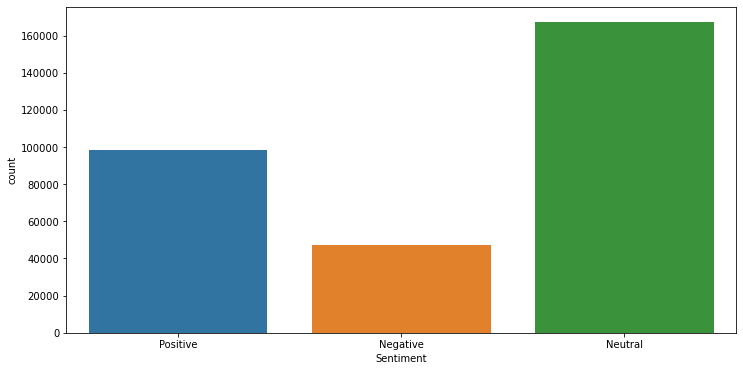

In [154]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=data)
fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [155]:
from matplotlib import rcParams

<ipython-input-156-f89d90dfb6ba>:18: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



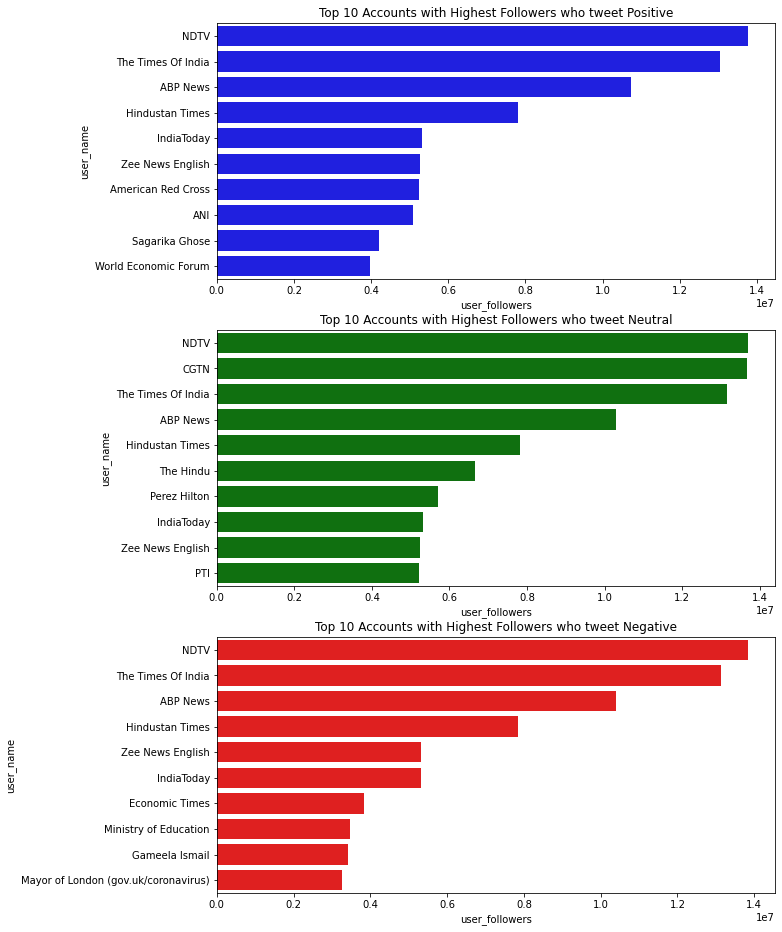

In [156]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 16))
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax1, palette=["b"],
           data=data[(data.Sentiment== "Positive")]\
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax1.set_title('Top 10 Accounts with Highest Followers who tweet Positive')
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax2, palette=["g"],
           data=data[(data.Sentiment == "Neutral")]
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax2.set_title('Top 10 Accounts with Highest Followers who tweet Neutral')
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax3, palette=["r"],
           data=data[(data.Sentiment == "Negative")]
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax3.set_title('Top 10 Accounts with Highest Followers who tweet Negative')

fig.show()

<Figure size 2880x720 with 0 Axes>

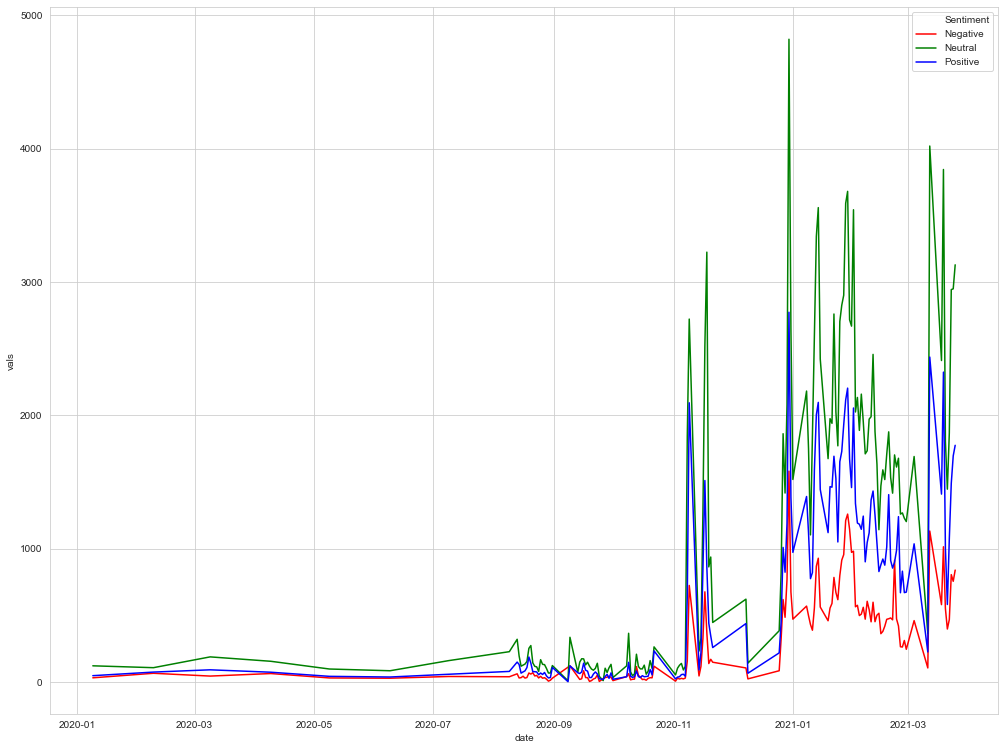

<Figure size 2880x720 with 0 Axes>

In [157]:
data["date"] = pd.to_datetime(data.date) 
timeline = data.resample('D', on='date')["Sentiment"].value_counts().unstack(1)

timeline.reset_index(inplace=True)

timeline = timeline.melt("date", var_name='Sentiment',  value_name='vals')

sns.set_style("whitegrid")
sns.lineplot(x="date", y="vals", hue="Sentiment", data=timeline, palette=["r", "g","b"])
plt.figure(figsize=(40,10))

In [158]:
print("Summary statistics of numerical features : \n", data.describe())

Summary statistics of numerical features : 
        Positive Sentiment  Neutral Sentiment  Negative Sentiment  \
count       312783.000000      312783.000000       312783.000000   
mean             0.116886           0.816750            0.054097   
std              0.169264           0.212249            0.117099   
min              0.000001           0.000001            0.000001   
25%              0.000001           0.702001            0.000001   
50%              0.000001           0.856001            0.000001   
75%              0.206001           1.000001            0.000001   
max              1.000001           1.000001            1.000001   

       Number_Of_Words  Mean_Word_Length  
count    312783.000000     312783.000000  
mean         11.627000          4.736058  
std           5.469371          1.127976  
min           1.000000          0.000000  
25%           7.000000          4.140000  
50%          12.000000          4.670000  
75%          16.000000          5.270000 

In [161]:
data['year']         = pd.DatetimeIndex(data['date']).year
import datetime
b_date_count = data.groupby(by='date').count().reset_index()
b_date_count = b_date_count.rename(columns={'user_name':'Tweets Per Day'})
fig = ex.line(b_date_count,x='date',y='Tweets Per Day')

# fig.add_annotation(x=b_date_mean['date'].values[15], y=.024,
#             text=r"Start Of Incline",
#             showarrow=True,
#             arrowhead=6,
#             yshift=10)


fig.add_shape(type="line",
    x0=b_date_count['date'].values[0], y0=b_date_count['Negative Sentiment'].mean(), x1=b_date_count['date'].values[-1], y1=b_date_count['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
)

fig.update_traces(mode="markers+lines")
fig.update_layout(hovermode="x unified")


###annots
b_date_count.date = pd.to_datetime(b_date_count.date)
b_date_count_dt = b_date_count.set_index('date')
fig.add_annotation(x=datetime.datetime(2021,2,19), y=b_date_count_dt.loc[pd.Timestamp('2021-02-19'),'year'],
            text=r"Israeli study finds Pfizer vaccine 85% effective after first shot",
            showarrow=True,
            arrowhead=3,
            yshift=5,bordercolor="#c7c7c7")

fig.add_annotation(x=datetime.datetime(2021,1,29), y=b_date_count_dt.loc[pd.Timestamp('2021-01-29'),'year'],
            text=r"vaccine found to be effective against variant discovered in U.K.",
            showarrow=True,
            arrowhead=3,
            yshift=5,ay=-160,bordercolor="#c7c7c7")
fig.add_annotation(x=datetime.datetime(2021,1,8), y=b_date_count_dt.loc[pd.Timestamp('2021-01-8'),'year'],
            text=r"Commission proposes to purchase up to 300 million additional doses of BioNTech-Pfizer vaccine",
            showarrow=True,
            arrowhead=3,
            yshift=5,ay=-30,bordercolor="#c7c7c7")

fig.add_annotation(x=datetime.datetime(2021,1,20), y=b_date_count_dt.loc[pd.Timestamp('2021-01-20'),'year'],
            text=r"The presidency of Joe Biden began",
            showarrow=True,
            arrowhead=3,
            yshift=3,ay=120,bordercolor="#c7c7c7")

fig.update_layout(title='<b> TREND ANALYSIS OF TWEETS WITH EVENTS ASSOCIATED TO THAT PARTICULAR DATE <b>',width=1200)
fig.show()